In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(121)

N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])



In [3]:


apple_width = np.random.normal(6, 0.5, 400)  # 6 is is median and 2 is variance
apple_length = np.random.normal(6, 0.5, 400)


In [4]:

banana_width = np.random.normal(4, 0.5, 400)  
banana_length = np.random.normal(8, 0.5, 400)


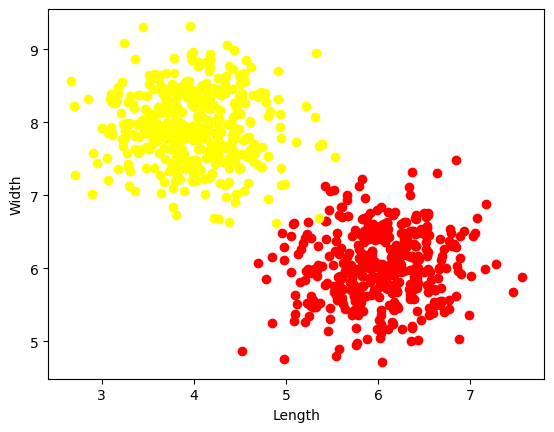

In [18]:
plt.xlabel('Length')
plt.ylabel('Width')

plt.scatter(apple_width, apple_length, color="red", label="Apples")
plt.scatter(banana_width, banana_length, color="yellow",label="Bananas")
plt.savefig("./1_1.jpg")

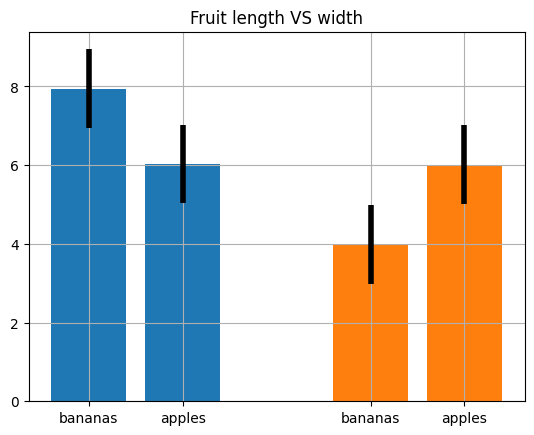

In [20]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [banana_length.mean(),
          apple_length.mean(),
          banana_width.mean(),
          apple_width.mean()]
yerr = [2*banana_length.std(),
        2*apple_length.std(),
        2*banana_width.std(),
        2*apple_width.std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()
plt.savefig("./1_2.jpg")

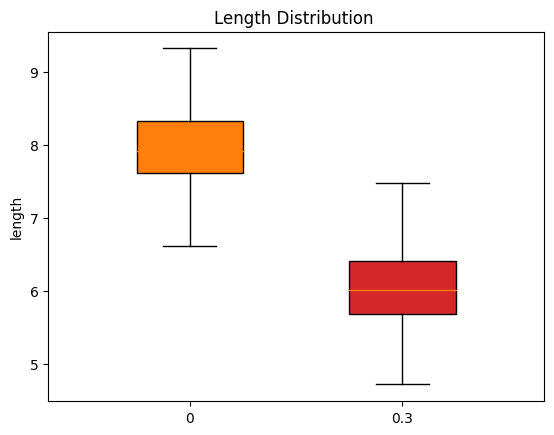

In [22]:

plt.boxplot(banana_length, patch_artist=True, boxprops={'facecolor': 'tab:orange'}, positions=[0])
plt.boxplot(apple_length, patch_artist=True, boxprops={'facecolor': 'tab:red'}, positions=[0.3])





plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')
plt.savefig("./1_3.jpg")


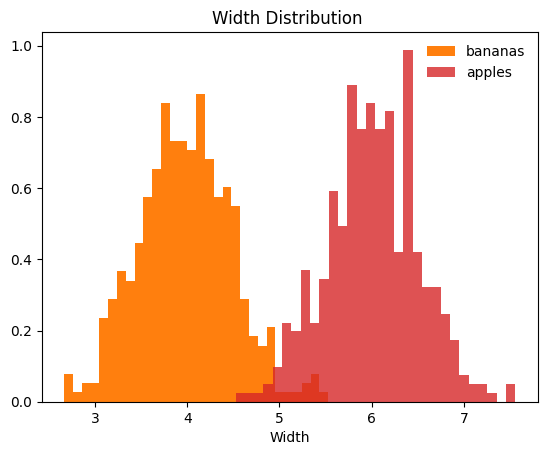

In [24]:

plt.hist(banana_width,
         bins=30, density=True, color='tab:orange', label='bananas',)
plt.hist(apple_width,
         bins=30, density=True, color='tab:red', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')
plt.savefig("./1_4.jpg")

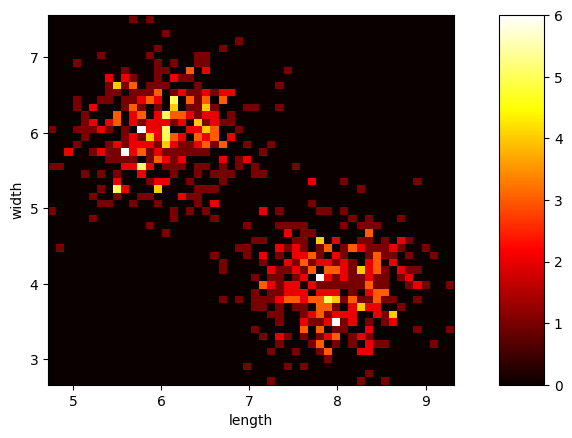

In [25]:
fruit_length = np.hstack((banana_length,apple_length))
fruit_width = np.hstack((banana_width,apple_width))
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x=fruit_length
, y=fruit_width, bins=50, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)
plt.savefig("./1_5.jpg")

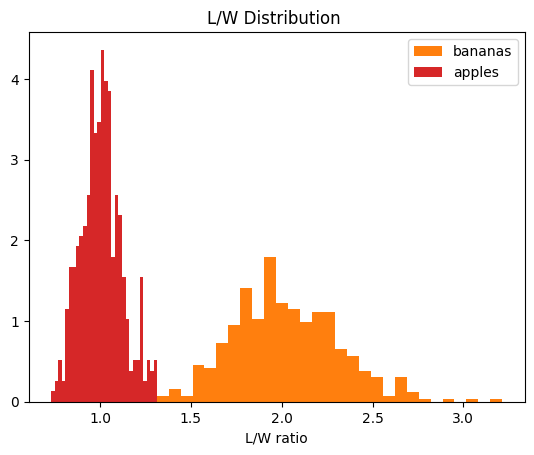

In [26]:
L_W_banana = banana_length/banana_width
L_W_apple = apple_length/apple_width


plt.hist(L_W_banana,
         bins=30, density=True, color='tab:orange', label='bananas',)
plt.hist(L_W_apple,
         bins=30, density=True, color='tab:red', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')
plt.savefig("./1_6.jpg")

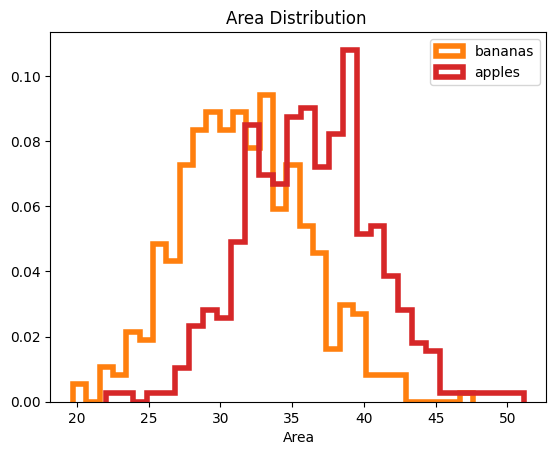

In [27]:
banana_area = banana_length*banana_width
apple_area = apple_length*apple_width
plt.hist( banana_area, histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='bananas')
plt.hist(apple_area, histtype='step', lw=4,
         bins=30, density=True, color='tab:red', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')
plt.savefig("./1_7.jpg")

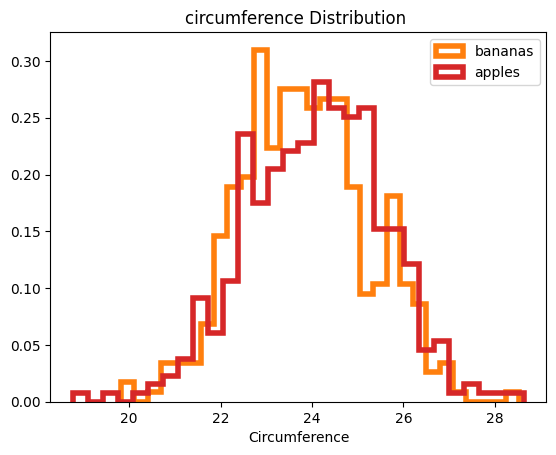

In [28]:
banana_circumference = 2*(banana_length+banana_width)
apple_circumference = 2*(apple_length+apple_width)
plt.hist(banana_circumference, histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='bananas')
plt.hist(apple_circumference, histtype='step', lw=4,
         bins=30, density=True, color='tab:red', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')
plt.savefig("./1_8.jpg")

In [29]:
from scipy import stats


In [30]:
stats.ttest_ind(L_W_banana,L_W_apple)

TtestResult(statistic=64.60380192031018, pvalue=3.0485e-319, df=798.0)

In [31]:
stats.ttest_ind(banana_width*banana_length,
                apple_width*apple_length)

TtestResult(statistic=-14.955958806039844, pvalue=9.143714374332429e-45, df=798.0)

In [32]:
stats.ttest_ind(banana_circumference, apple_circumference)

TtestResult(statistic=-2.255732712051949, pvalue=0.024357419520095364, df=798.0)